In [1]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf



2024-09-19 14:17:56.225489: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 14:17:56.242595: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-19 14:17:56.247785: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-19 14:17:56.259714: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-19 14:17:57.030583: W tensorflow/compiler/tf2

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        print("Using GPU 0 for training")
    except RuntimeError as e:
        print(e)


Using GPU 0 for training


In [3]:
train_dataset_path = "/home/user/JAYANT/training_3"
test_dataset_path = "/home/user/JAYANT/testing_3"

In [11]:
testGen = ImageDataGenerator()
trainGen = ImageDataGenerator(validation_split=0.15,vertical_flip=True,horizontal_flip=True,rotation_range=0.2)
trainGenerator = trainGen.flow_from_directory(train_dataset_path,subset="training",target_size=(224,224),batch_size=128)
validationGenerator = trainGen.flow_from_directory(train_dataset_path,subset="validation",target_size=(224,224),batch_size=128)
testGenerator = testGen.flow_from_directory( test_dataset_path,target_size=(224,224),shuffle=False) 

Found 3934 images belonging to 2 classes.
Found 693 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [12]:
base_model = ResNet50(include_top=False,weights="imagenet")
for layer in base_model.layers[:140]:
    layer.trainable = False
model = keras.Sequential()
model.add(layers.Input(shape=(224,224,2)))
model.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(2, activation="softmax"))
model.summary()
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, None, None,     │    23,587,712 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 14,978,048 (57.14 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

In [13]:
r = model.fit(
  trainGenerator,
  validation_data=validationGenerator,
  epochs=10,
  steps_per_epoch=len(trainGenerator),
  validation_steps=len(validationGenerator)
)

Epoch 1/10


/home/user/miniconda3/envs/jayantevn/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-19 14:38:26.947095: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 2 of 8
2024-09-19 14:38:37.580484: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-19 14:38:48.193296: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-19 14:38:58.639840: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled

31/31 ━━━━━━━━━━━━━━━━━━━━ 215s 5s/step - accuracy: 0.8294 - loss: 0.3448 - val_accuracy: 0.9278 - val_loss: 0.2158
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/home/user/miniconda3/envs/jayantevn/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-09-19 14:41:54.891639: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 2 of 8
2024-09-19 14:42:05.923188: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-19 14:42:16.686180: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 6 of 8


 1/31 ━━━━━━━━━━━━━━━━━━━━ 21:40 43s/step - accuracy: 0.9922 - loss: 0.0195

2024-09-19 14:42:27.315943: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


31/31 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9553 - val_loss: 0.1567
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10


2024-09-19 14:45:06.617849: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 2 of 8
2024-09-19 14:45:17.181985: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-19 14:45:27.920112: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 6 of 8


 1/31 ━━━━━━━━━━━━━━━━━━━━ 21:26 43s/step - accuracy: 0.9844 - loss: 0.0339

2024-09-19 14:45:38.407825: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


31/31 ━━━━━━━━━━━━━━━━━━━━ 193s 5s/step - accuracy: 0.9954 - loss: 0.0122 - val_accuracy: 0.9928 - val_loss: 0.0150
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10


2024-09-19 14:48:08.493884: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
2024-09-19 14:48:19.367701: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 2 of 8
2024-09-19 14:48:30.241107: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-19 14:48:40.855113: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 6 of 8


 1/31 ━━━━━━━━━━━━━━━━━━━━ 20:54 42s/step - accuracy: 1.0000 - loss: 0.0026

2024-09-19 14:48:50.196063: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


31/31 ━━━━━━━━━━━━━━━━━━━━ 198s 5s/step - accuracy: 0.9999 - loss: 0.0026 - val_accuracy: 0.9971 - val_loss: 0.0141
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10


2024-09-19 14:51:36.609653: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 2 of 8
2024-09-19 14:51:46.719812: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 4 of 8
2024-09-19 14:51:57.756782: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:26: Filling up shuffle buffer (this may take a while): 6 of 8


 1/31 ━━━━━━━━━━━━━━━━━━━━ 21:03 42s/step - accuracy: 1.0000 - loss: 0.0026

2024-09-19 14:52:08.265225: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


31/31 ━━━━━━━━━━━━━━━━━━━━ 192s 5s/step - accuracy: 0.9997 - loss: 0.0020 - val_accuracy: 0.9971 - val_loss: 0.0106
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


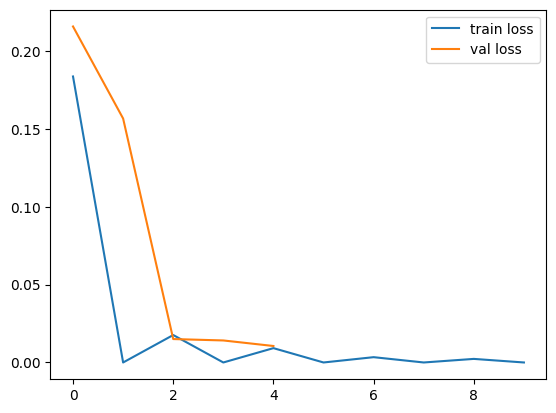

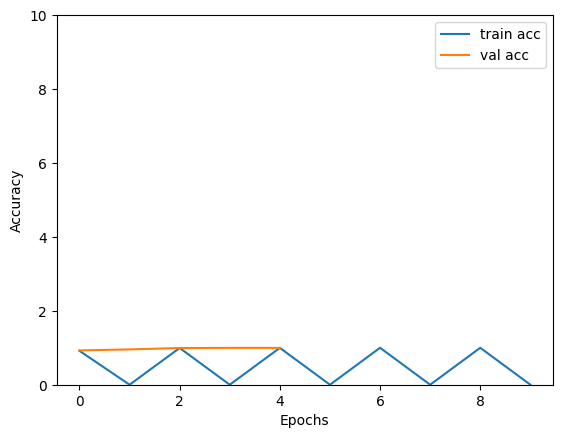

<Figure size 640x480 with 0 Axes>

In [14]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
import matplotlib.pyplot as plt

# Plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.ylim(0, 10)  # Set y-axis limits from 0 to 1
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save the plot as a file
plt.savefig('AccVal_acc.png')


2024-09-19 14:54:44.751540: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1701', 196 bytes spill stores, 196 bytes spill loads



5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step 
Test Accuracy: 99.265 %


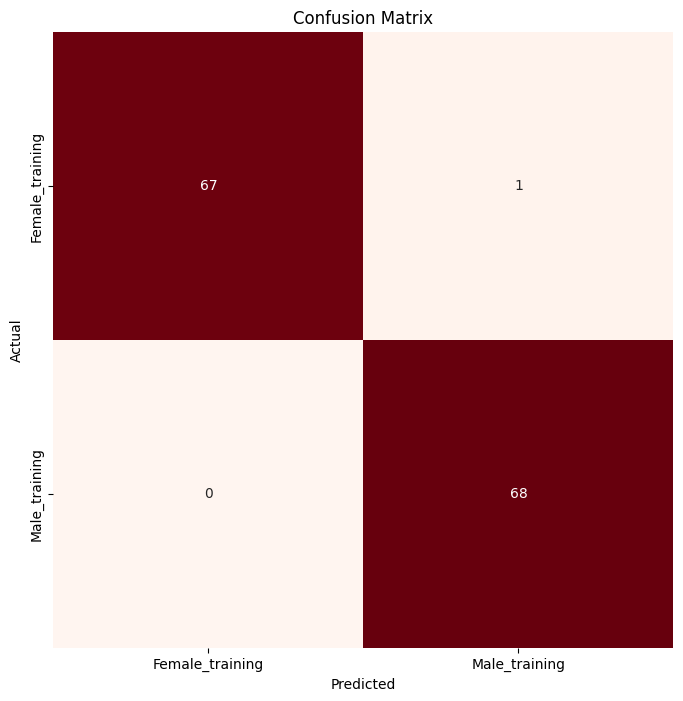

Classification Report:
-----------------------------
                  precision    recall  f1-score   support

Female_training       1.00      0.99      0.99        68
  Male_training       0.99      1.00      0.99        68

       accuracy                           0.99       136
      macro avg       0.99      0.99      0.99       136
   weighted avg       0.99      0.99      0.99       136



In [15]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model.predict(testGenerator), axis=1)

acc = accuracy_score(testGenerator.labels, predictions)
cm = tf.math.confusion_matrix(testGenerator.labels, predictions)
clr = classification_report(testGenerator.labels, predictions, target_names=CLASS_NAMES)
clr
print("Test Accuracy: {:.3f} %".format(acc * 100))

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Reds', cbar=False)
plt.xticks(ticks=np.arange(2) + 0.5, labels=CLASS_NAMES)
plt.yticks(ticks=np.arange(2) + 0.5, labels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-----------------------------\n", clr)

In [16]:
from tensorflow.keras.models import load_model

 #Assuming your ResNet-50 model is stored in the 'model' variable
model.save("/home/user/JAYANT/saved_models/drosophilaa_resnet50_classifier.keras")




In [17]:
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
from PIL import Image

# Path to the saved ResNet-50 model
model_path = "/home/user/JAYANT/saved_models/drosophilaa_resnet50_classifier.keras"

# Load the saved ResNet-50 model with custom objects
loaded_model = load_model(model_path, custom_objects={'preprocess_input': preprocess_input})

# Verify the loaded model by printing its summary
loaded_model.summary()

# Define the class names (adjust according to your model's classes)
CLASS_NAMES = ['Females', 'males']  # Replace with your actual class names


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, None, None,     │    23,587,712 │
│                                 │ 2048)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         4,098 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,556,104 (204.30 MB)

 Trainable params: 14,982,146 (57.15 MB)

 Non-trainable params: 8,609,664 (32.84 MB)

 Optimizer params: 29,964,294 (114.30 MB)